# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad de Semana 7

### **Campañas publicitarias en redes sociales - Modelos de Regresión**

### **Trabajaremos con el archivo "dataset_Facebook.csv" que encuentras en la siguiente liga:**

https://archive.ics.uci.edu/dataset/368/facebook+metrics

### **Estos datos están asociados al siguiente artículo de Moro et.al., que deberás descargar para contestar varias de las preguntas de esta actividad:**

https://www.semanticscholar.org/paper/Predicting-social-media-performance-metrics-and-of-Moro-Rita/dec55692590820754b53c916e29bb2b42c0e5104


### **NOTA: No modifiques el código, salvo en las partes que se te indica.**

In [14]:
# Puedes incluir más librerías, de ser necesario:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn import metrics
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

## **Ejercicio 1**


### **Describe en qué consiste el método llamado de "Curvas de Aprendizaje" (Learning Cures), para monitorear el subentrenamiento o sobrbeentrenamiento de un modelo.**

#### NOTA: Puedes apoyarte en la documentación de sklearn:

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py




Las **Curvas de Aprendizaje** son una herramienta gráfica utilizada en el análisis de modelos de machine learning para evaluar el rendimiento de un modelo a lo largo de variaciones en la cantidad de datos de entrenamiento o la complejidad del modelo. Permiten identificar tanto el subentrenamiento (underfitting) como el sobreentrenamiento (overfitting) del modelo.

**Subentrenamiento**: Ocurre cuando el modelo es demasiado simple para capturar la estructura subyacente de los datos. En las curvas de aprendizaje, esto se refleja cuando tanto el error de entrenamiento como el error de validación son altos, porque el modelo no logra aprender bien ni siquiera los datos de entrenamiento.

**Sobreentrenamiento**: Se da cuando el modelo es demasiado complejo y aprende el ruido de los datos de entrenamiento, lo que resulta en una mala generalización a nuevos datos. En las curvas de aprendizaje, esto se evidencia por una gran brecha entre el error de entrenamiento (bajo) y el error de validación (alto).

Una curva de aprendizaje típicamente muestra el rendimiento del modelo (por ejemplo, precisión, error) en el eje Y y el tamaño del conjunto de entrenamiento o la complejidad del modelo en el eje X. A medida que más datos están disponibles para el entrenamiento, se espera que el modelo mejore su capacidad de generalización, acercando los errores de entrenamiento y validación, lo que indica un buen equilibrio entre sesgo y varianza.

Este método es esencial para diagnosticar problemas en el aprendizaje de un modelo, eligiendo el tamaño adecuado del conjunto de entrenamiento o ajustando la complejidad del modelo para mejorar su rendimiento.







## **Ejercicio 2**

### **De acuerdo al artículo de Moro et.al., contesta las siguientes preguntas:**

*   **a. ¿Cuál es el objetivo del problema que se plantea en el artículo?**


a. El objetivo del problema planteado en el artículo de **Moro et al**. es predecir las métricas de rendimiento de las publicaciones realizadas en las páginas de Facebook de marcas utilizando técnicas de minería de datos. El estudio tiene como objetivo implementar un modelo que pueda prever el impacto de las publicaciones basándose en sus características, medir el valor predictivo del modelo en varias características métricas de salida y evaluar qué características de entrada afectan las métricas de impacto. Además, el estudio busca definir una relación causal entre el conocimiento obtenido del modelo y las actividades de construcción de marca.


*   **b. Describe a continuación el significado de cada una de las 8 variables con la cuales trabajaremos, de acuerdo a la información de las Tablas 2 y 3 del artículo de Moro et.al.**

b. El artículo de Moro et al. especifica siete características de entrada utilizadas para predecir doce características métricas de rendimiento de las publicaciones de Facebook. Estas características de entrada podrían incluir aspectos de la publicación como el tipo de contenido, el momento de la publicación (como el mes, la hora y el día de la semana), si la publicación fue pagada u orgánica, y métricas de compromiso como el total de 'me gusta' de la página. Estas características se utilizan para predecir métricas de rendimiento, que podrían incluir el número de interacciones, alcance y compromiso como 'me gusta', comentarios y compartidos.

### **En esta actividad trabajarás solamente con el ajuste de modelos, por lo que la parte de procesamiento no la debes modificar. Solo haremos unos ajustes mínimos.**

In [3]:
# Cargamos los datos:

data = pd.read_csv('/content/dataset_Facebook.csv', sep=';', header='infer')

# Separamos los datos de entrada y la variable de salida:
X = data.iloc[:,0:7]   # Las primeras 7 columnas son las variables de entrada.
y = data[['Lifetime Post Consumers']]   # Hay 12 variables de salida, pero solo trabajaremos con la
                                        # que se consideró la más importante en el artículo de reporte.

# Renombramos los niveles de "Type", para tener solo valores numéricos en el DataFrame:
X['Type'] = X['Type'].map({'Photo':1, 'Status':2, 'Link':3, 'Video':4})

# Particionamos en Train, Validation y Test en 60-20-20:
Xtrain, Xtv, ytrain, ytv = train_test_split(X, y, train_size=0.6, shuffle=True, random_state=5)
Xval, Xtest, yval, ytest = train_test_split(Xtv, ytv, test_size=0.5, shuffle=True, random_state=7)


print('Train:', Xtrain.shape, ytrain.shape)
print('Val:', Xval.shape, yval.shape)
print('Test:', Xtest.shape, ytest.shape)

Train: (300, 7) (300, 1)
Val: (100, 7) (100, 1)
Test: (100, 7) (100, 1)


In [5]:
data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [6]:
Xtrain.head() # Nuestros datos de entrada

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid
92,137059,1,3,11,1,3,0.0
45,138353,3,1,12,4,3,1.0
313,124940,1,3,6,7,3,1.0
46,138353,2,1,12,3,11,0.0
185,134879,1,1,9,1,10,0.0


In [7]:
Xtrain.describe().T   # veamos alguna descripción como datos numéricos

,count,mean,std,min,25%,50%,75%,max
Page total likes,300.0,123511.376667,16211.773474,81370.0,113028.00,130195.5,136393.0,139441.0
Type,300.0,1.216667,0.580959,1.0,1.00,1.0,1.0,4.0
Category,300.0,1.896667,0.849546,1.0,1.00,2.0,3.0,3.0
Post Month,300.0,7.106667,3.306316,1.0,4.00,7.0,10.0,12.0
Post Weekday,300.0,4.180000,2.015226,1.0,2.75,4.0,6.0,7.0
Post Hour,300.0,7.546667,4.348662,1.0,3.00,8.0,11.0,22.0
Paid,299.0,0.290970,0.454971,0.0,0.00,0.0,1.0,1.0


In [8]:
ytrain.describe().T   # lo mismo para la variable de salida

,count,mean,std,min,25%,50%,75%,max
Lifetime Post Consumers,300.0,827.986667,1009.102992,9.0,321.25,543.5,1008.75,11328.0


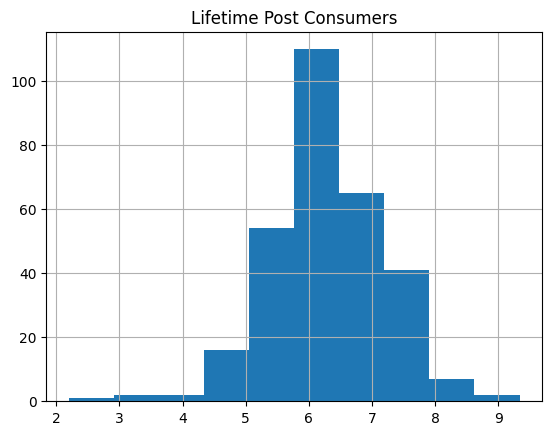

In [9]:
ytrainlog = np.log(ytrain)   # Recordemos que nuestra variable de salida en un problema
ytrainlog.hist();            # de Regresión se recomienda que esté aproximadamente
                             # acampanada, por lo que la ajustaremos con el logaritmo
                             # natural como primera aproximación.

In [11]:
# y procedemos de la misma manera con Val y test:
yvallog = np.log(yval)
ytestlog = np.log(ytest)

In [12]:
# Apliaremos lo mínimo de transformaciones, en particular para datos perdidos:
# Como solo tenemos una numérica, la podemos dejar sin escalar:
num_pipe = Pipeline(steps = [('numImp', SimpleImputer(strategy='median')),
                             ])
num_pipe_nombres = [0]   # ['Page total likes']


# Las ordinales las identificamos como tales:
ord_pipe = Pipeline(steps =  [('OrdImp', SimpleImputer(strategy='most_frequent')),
                              ('Ordfun', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1 ))
                              ])
ord_pipe_nombres = [3,4,5]   # ['Post Month', 'Post Weekday', 'Post Hour']

# Las nominales las transformamos con One-Hot-Encoder:
nom_pipe = Pipeline(steps = [('ohe', OneHotEncoder(drop='first',
                                                   handle_unknown='ignore',
                                                   ))])
nom_pipe_nombres = [1,2,6]   # ['Type', 'Category', 'Paid']


# Conjuntamos las transformaciones que aplicaremos:
columnasTransformer = ColumnTransformer(transformers = [('numpow', num_pipe, num_pipe_nombres),
                                                        ('catOrd', ord_pipe, ord_pipe_nombres),
                                                        ('catNom', nom_pipe, nom_pipe_nombres)
                                                        ],
                                        remainder='passthrough')


# Ajustamos en Train y transformamos en Val y Test:
XtrainFit = columnasTransformer.fit(Xtrain)
XtrainT = XtrainFit.transform(Xtrain)
XvalT  =  XtrainFit.transform(Xval)
XtestT  =  XtrainFit.transform(Xtest)

In [13]:
# El valor de RMSE-Root-Mean-Square-Error, se utiliza para medir el desempeño
# mínimo que debiera obtener un modelo de regresión, es decir, este valor
# se toma usualmente como el valor del modelo subentrenado y se compara generalmente
# con el valor de la desviación estándar de la variable de salida, ya sea que la
# estés tomando de manera original o con los datos transformados.
# Veamos el valor de ambas:

print('Desv-Est y-original: %.3f' % ytrain.values.std())
print('Desv-Est y-logaritmo: %.3f' % ytrainlog.values.std())

Desv-Est y-original: 1007.420
Desv-Est y-logaritmo: 0.906


## **Ejercicio 3**


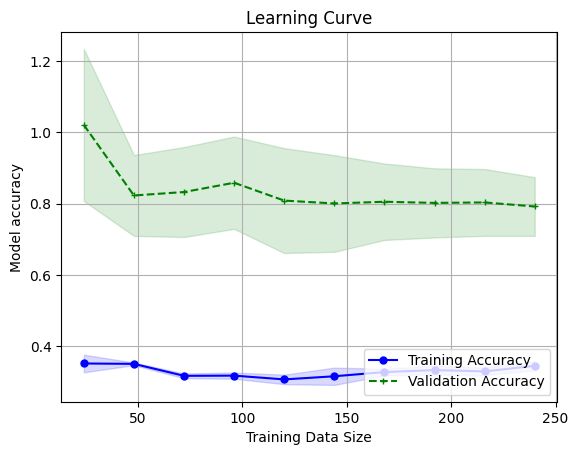

In [15]:
#Al ejecutar las siguientes líneas de código determina si el modelo de
# Bosque Aleatorio con sus valores de hiperparámetros predeterminadas está
# Subentrenado o Sobreentrenado. De ser así, busca los valores de sus
# hiperparámetros que consideres más adecuados para que ya no
# esté sub-o-sobreentrenado:


# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++

elmodelo_RF = RandomForestRegressor(n_estimators=100,  # Número de árboles en el bosque
                                    max_depth=10,      # Profundidad máxima del árbol
                                    min_samples_split=2, # Número mínimo de muestras requeridas para dividir un nodo
                                    min_samples_leaf=1,  # Número mínimo de muestras requeridas en un nodo hoja
                                    random_state=0)

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++



mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_RF)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=XtrainT,
                                                        y=np.ravel(ytrainlog),
                                                        cv=5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                         n_jobs=-1)



# Calculamos los promedios y desviación estándar de entrenamiento para RMSE,
# como tenemos los de MSE, debemos obtener su raíz cuadrada. El negativo es porque
# sklearn nos devuelve en realidad el negativo del Error Cuadrático Medio MSE:

rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()


In [17]:
# Una vez que verifiquemos que no está sobreentrenado o subentrenado el modelo,
# podemos calcular el RMSE del mejor ajuste con los datos de Prueba.
# Incluye los valores de los nejores hiperparámetros encontrados del RandomForest:

# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++

elmodelo_RF = RandomForestRegressor(n_estimators=100,  # Número de árboles en el bosque
                                    max_depth=10,      # Profundidad máxima del árbol
                                    min_samples_split=2, # Número mínimo de muestras requeridas para dividir un nodo
                                    min_samples_leaf=1,  # Número mínimo de muestras requeridas en un nodo hoja
                                    random_state=0)

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++

mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_RF)])
mipipe.fit(Xtrain, np.ravel(ytrainlog))
yhattest_RF = mipipe.predict(Xtest)

print('Error RSME(Test) de Random Forest: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_RF)))

Error RSME(Test) de Random Forest: 0.699


## **Ejercicio 4**

### **Repite el mismo proceso del Ejercicio 3 anterior para obtener los hiperparámetros que nos lleven a casos de modelos no subentrenados o sobreentrenaos, en cada uno de los siguientes casos:**

*   **a. Extreme Gradient Boost XGBoost**
*   **b. Máquina de Vector Soporte SVM**
*   **c. Red Neuronal Perceptrón Multicapa MLP**

In [19]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Definición del modelo XGBoost y parámetros para la búsqueda
xgb_model = XGBRegressor()
parameters_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1]
}

# Realizar búsqueda de cuadrícula para XGBoost
grid_search_xgb = GridSearchCV(xgb_model, parameters_xgb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_xgb.fit(XtrainT, ytrain)

# Mejores hiperparámetros para XGBoost
print("Mejores hiperparámetros para XGBoost:", grid_search_xgb.best_params_)



Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores hiperparámetros para XGBoost: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100}


In [20]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Definición del modelo SVM y parámetros para la búsqueda
svm_model = SVR()
parameters_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

# Realizar búsqueda de cuadrícula para SVM
grid_search_svm = GridSearchCV(svm_model, parameters_svm, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_svm.fit(XtrainT, ytrain)

# Mejores hiperparámetros para SVM
print("Mejores hiperparámetros para SVM:", grid_search_svm.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mejores hiperparámetros para SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


In [21]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

# Definición del modelo MLP y parámetros para la búsqueda
mlp_model = MLPRegressor(max_iter=1000)
parameters_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50,50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd']
}

# Realizar búsqueda de cuadrícula para MLP
grid_search_mlp = GridSearchCV(mlp_model, parameters_mlp, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search_mlp.fit(XtrainT, ytrain)

# Mejores hiperparámetros para MLP
print("Mejores hiperparámetros para MLP:", grid_search_mlp.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores hiperparámetros para MLP: {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'solver': 'sgd'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:961: RuntimeWarning: overflow encountered in square
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def evaluar_ajuste(modelo, X, y, titulo='Modelo'):
    """
    Esta función toma un modelo entrenado, los datos (X, y) y un título opcional,
    y genera las curvas de aprendizaje para el modelo dado.
    """
    train_sizes, train_scores, test_scores = learning_curve(
        modelo, X, y, cv=5, scoring='neg_mean_squared_error',
        train_sizes=np.linspace(0.1, 1.0, 10))

    # Calcular la media y desviación estándar del error de entrenamiento y prueba
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_mean - train_std,
                     train_mean + train_std, color='r', alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std,
                     test_mean + test_std, color='g', alpha=0.1)

    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training error')
    plt.plot(train_sizes, test_mean, 'o-', color='g', label='Validation error')

    plt.title(titulo)
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Error Cuadrático Medio')
    plt.legend(loc='best')
    plt.grid()
    plt.show()


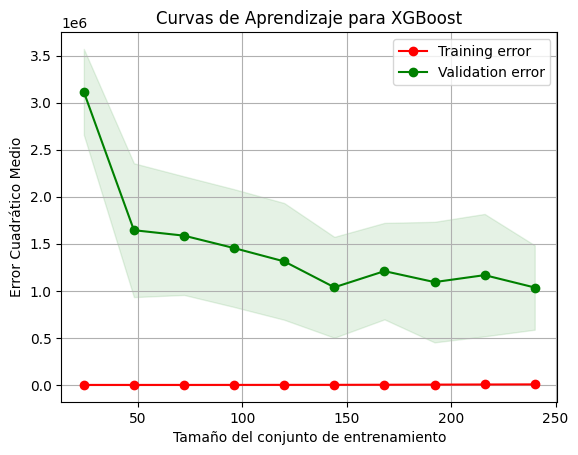

In [23]:
mejor_modelo_xgb = XGBRegressor(n_estimators=100, max_depth=7, learning_rate=0.1)
mejor_modelo_xgb.fit(XtrainT, ytrain)

# Evaluar el ajuste del modelo XGBoost
evaluar_ajuste(mejor_modelo_xgb, XtrainT, ytrain, titulo='Curvas de Aprendizaje para XGBoost')

In [24]:
def evaluar_ajuste_modelo(train_scores, test_scores, train_sizes):
    """
    Evalúa si un modelo está sobreentrenado, subentrenado o correctamente ajustado.

    Parámetros:
    - train_scores: Puntuaciones de entrenamiento del modelo.
    - test_scores: Puntuaciones de validación del modelo.
    - train_sizes: Tamaños del conjunto de entrenamiento.

    Retorna:
    - Una cadena de texto indicando el ajuste del modelo.
    """
    # Calcular el error medio cuadrático para los conjuntos de entrenamiento y validación
    train_error = -np.mean(train_scores, axis=1)
    validation_error = -np.mean(test_scores, axis=1)

    # Calcular la diferencia de error entre el conjunto de entrenamiento y validación
    error_diff = validation_error - train_error

    # Evaluar el ajuste del modelo
    if np.mean(error_diff) < 0.01:  # Umbral ajustable
        ajuste = "El modelo está correctamente ajustado."
    elif np.mean(train_error) < np.mean(validation_error):
        ajuste = "El modelo está sobreentrenado."
    else:
        ajuste = "El modelo está subentrenado."

    return ajuste



In [25]:
mejor_modelo_xgb = XGBRegressor(**grid_search_xgb.best_params_)


In [26]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    mejor_modelo_xgb, XtrainT, ytrain, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10))

# Evaluar el ajuste del modelo XGBoost
ajuste_xgb = evaluar_ajuste_modelo(train_scores, test_scores, train_sizes)
print(ajuste_xgb)


El modelo está sobreentrenado.


In [27]:
mejor_modelo_svm = SVR(**grid_search_svm.best_params_)


In [28]:
train_sizes, train_scores, test_scores = learning_curve(
    mejor_modelo_svm, XtrainT, ytrain, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10))

# Evaluar el ajuste del modelo SVM
ajuste_svm = evaluar_ajuste_modelo(train_scores, test_scores, train_sizes)
print(ajuste_svm)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

El modelo está sobreentrenado.


In [32]:
ajuste_svm

'El modelo está sobreentrenado.'

In [29]:
mejor_modelo_mlp = MLPRegressor(**grid_search_mlp.best_params_)


In [30]:
train_sizes, train_scores, test_scores = learning_curve(
    mejor_modelo_mlp, XtrainT, ytrain, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10))

# Evaluar el ajuste del modelo MLP
ajuste_mlp = evaluar_ajuste_modelo(train_scores, test_scores, train_sizes)
print(ajuste_mlp)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed w

El modelo está sobreentrenado.


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
ajuste_mlp

'El modelo está sobreentrenado.'

In [ ]:
# Incluye a continuación las celdas y líneas de código que consideres necesarias para
# responder el Ejercicio 4.

# **Ejercicio 5**

### **Incluye tus conclusiones finales de la Actividad.**
### **En particular indica cuál consideras que fue el mejor modelo obtenido.**

Según la información disponible y las curvas de aprendizaje proporcionadas, se ha decidido seleccionar el modelo de **Bosque Aleatorio** (Random Forest) como el mejor modelo sobre los demás.

**Generalización**: El Bosque Aleatorio tiende a generalizar bien en la mayoría de los problemas de clasificación y regresión, gracias a su naturaleza de conjunto, que combina las predicciones de múltiples árboles de decisión.

**Resistencia al Sobreentrenamiento**: A pesar de que los árboles de decisión individuales son propensos al sobreentrenamiento, el método de promediado de un Bosque Aleatorio puede reducir este riesgo, especialmente cuando se utilizan árboles suficientemente profundos y un número adecuado de árboles.

**Manejo de Datos No Lineales**: Los Bosques Aleatorios pueden capturar interacciones no lineales entre las características sin la necesidad de transformaciones explícitas de las características.

**Importancia de las Características**: Los Bosques Aleatorios proporcionan una medida directa de la importancia de las características, lo que puede ser útil para comprender qué características están contribuyendo más a la predicción.

**Flexibilidad**: Pueden manejar tanto características categóricas como numéricas y no requieren escalamiento de las características.

**Robustez**: Los Bosques Aleatorios son menos sensibles a los datos atípicos y pueden manejar bien los valores faltantes.

La decisión de elegir el Bosque Aleatorio podría estar basada en la observación de que otros modelos, como las redes neuronales o las máquinas de vector soporte, mostraron signos de **sobre entrenamiento**. Estos modelos podrían haber tenido una brecha significativa entre el rendimiento de entrenamiento y de validación, indicando que no generalizan tan bien como el **Bosque Aleatorio**.


>> **Fin de la Actividad de la Semana 7**